In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mentalNLP.csv')

#### Deleting irrelevant columns

In [3]:
todel = ['Unnamed: 0','Start Date (UTC)','Network ID','Submit Date (UTC)','#']
data = data.drop(todel,axis=1)


#### NaN = empty string

In [4]:
data = data.fillna(' ')

In [5]:
import re

In [6]:
datafeature, datatype,nullpct,unique = [],[],[],[]
for item in data.columns:
    datafeature.append(item)
    datatype.append(data[item].dtype)
    nullpct.append(round(((data[item].isnull().sum() / len(data))*100),2))
    unique.append(len(data[item].unique()))




dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}

mentalinfo = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
mentalinfo

dataFeatures  \
0   Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.                                                     
1   Describe the circumstances of the badly handled or unsupportive response.                                                                                                             
2   Describe the conversation with coworkers you had about your mental health including their reactions.                                                                                  
3   Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.   
4   Describe the conversation you had with your previous coworkers about your mental health including their reactions.                                                                    
5   Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.    
6   Describe the conversation your coworker had with you about their mental health (please do not use names).                                                                             
7   Describe the conversation your coworker had with you about their mental health (please do not use names)..1                                                                           
8   If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.                                                
9   Why or why not?                                                                                                                                                                       
10  Why or why not?.1                                                                                                                                                                     
11  Do you currently have a mental health disorder?                                                                                                                                       

   dataType  nullPct  unique  
0   object   0.0      778     
1   object   0.0      248     
2   object   0.0      332     
3   object   0.0      269     
4   object   0.0      221     
5   object   0.0      166     
6   object   0.0      351     
7   object   0.0      203     
8   object   0.0      221     
9   object   0.0      881     
10  object   0.0      878     
11  object   0.0      4

In [7]:
data['Do you currently have a mental health disorder?'].value_counts()

Yes           515
No            334
Possibly      226
Don't Know    98 
Name: Do you currently have a mental health disorder?, dtype: int64

#### Change target into 3 unique values

In [8]:
for item in range(len(data['Do you currently have a mental health disorder?'])):
    if (data['Do you currently have a mental health disorder?'][item]=="Don't Know"):
       data['Do you currently have a mental health disorder?'][item]='Possibly' 

In [9]:
data.columns

Index(['Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
       'Describe the circumstances of the badly handled or unsupportive response.',
       'Describe the conversation with coworkers you had about your mental health including their reactions.',
       'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
       'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
       'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
       'Describe the conversation your coworker had with you about their mental health (please do not use names).',
       'Describe the conversation your cowork

#### Make a new column called "join", filled with combination of all strings in a row

In [10]:
data['join']=data['Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']+'_'+data['Describe the circumstances of the badly handled or unsupportive response.']+'_'+data['Describe the conversation with coworkers you had about your mental health including their reactions.']+'_'+data['Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.']+'_'+data['Describe the conversation you had with your previous coworkers about your mental health including their reactions.']+'_'+data['Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.']+'_'+data['Describe the conversation your coworker had with you about their mental health (please do not use names).']+'_'+data['Describe the conversation your coworker had with you about their mental health (please do not use names)..1']+'_'+data['If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.']+'_'+data['Why or why not?']+'_'+data['Why or why not?.1']

In [11]:
data.head()

Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
0  They don't take it seriously                                                                                                       
1  raise awareness, talk about it to lessen the stigma                                                                                
2  Education and awareness, statistics, add supportive writing to the company handbook                                                
3  More support, less burnout and death marches                                                                                       
4  I think tech is more internal and they don't really talk about feelings or issues.                                                 

                                                                                                                                                              Describe the circumstances of the badly handled or unsupportive response.  \
0                                                                                                                                                                                                                                         
1  During a discussion about "mental health first aider" at work, a coworker dismissed the whole idea, saying that "no one here suffers from Mental Health Disorder"                                                                      
2  I was suffering depression and I was open about that, that is why my numbers fell, but then I started drinking too much and admitted myself into a detox/psych facility to get better... 5 days later I get out to find myself fired   
3                                                                                                                                                                                                                                         
4                                                                                                                                                                                                                                         

  Describe the conversation with coworkers you had about your mental health including their reactions.  \
0  Spoke about my anxiety they were very supportive                                                      
1  the coworker was comprehensive, empathetic and understanding                                          
2  They all seemed understanding and some even admitted to having some issues themselves                 
3  Coworkers that have become friends with me are supportive                                             
4                                                                                                        

  Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.  \
0                                                                                                                                                                                       
1                                                                                                                                                                                       
2  The conversation went well, he too suffers mental illness... however, I was just fired for having a mental illness episode and not being about to get my work done.                  
3  Direct Manager and HR know because of medication. No real reactions                                                                                                                  
4                                                                                                                                                                                       

  Describe the conversation you 

In [12]:
# listjoin = []
# col = data.columns
# for item in col:
#     for y in range(len(data[item])):
#         a= data[item][y]
#         listjoin.append(a)

    



#### change everything to lowercase alphabet

In [13]:
def clean_text(x):
    letter_only= re.sub("[^a-zA-Z]"," ",x)
    return ' '.join(letter_only.split()).lower()
for item in data.columns:
    data[item] = data[item].apply(clean_text)


#### Quick skimming between healthy and unhealthy respondent

In [14]:
data[data['Do you currently have a mental health disorder?']=='no']

Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
4     i think tech is more internal and they don t really talk about feelings or issues                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
5     awareness changed work schedules and expectations                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
7     i think we over work ourselves and each other we expect everyone to be connected all the time and humans just weren t meant to work to this degree we need to cut each other more slack                                                                                                                                                                                                                                                                                                                                                                                                                         
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
17    raise awareness and offer services                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
38                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
41    need programs like osmi                                                                                                                                                                                                                                                    

In [15]:
data[data['Do you currently have a mental health disorder?']=='yes']

Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.  \
2     education and awareness statistics add supportive writing to the company handbook                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
3     more support less burnout and death marches                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
6     be more vocal about supporting employees with issues and supporting mental health time off                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
10    be open about talking about and open about accommodations for it and stop pushing workers toward burnout                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
11    make employees more aware of any programs they have options to stop firing people that have these problems rather then deal with it realize that just because someone might miss a lot of work its not because they are lazy with me its because of stress and depression my job is almost nothing but pressure stress and trying to make everything perfect i m a qa and the entire companies software dependability rests on my shoulders alone                                                                                                                                                                                                                                                         
13    i think that the opportunity to have mental health sick leave should be just as important as normal sick leave also burnout is a huge issue in tech                                                                                                                                                                                                                                                                             

## Try to vectorize and make model, do we have good data to make prediction?

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vectorizer_transformer = CountVectorizer().fit(data['join'])

In [17]:
count_vectorizer_res = count_vectorizer_transformer.transform(data['join'])

In [18]:
pd.DataFrame(count_vectorizer_res.todense(), columns = count_vectorizer_transformer.get_feature_names())

abandon  aberration  abikity  abilities  ability  able  ableism  ablism  \
0     0        0           0        0          0        0     0        0        
1     0        0           0        0          0        0     0        0        
2     0        0           0        0          0        0     0        0        
3     0        0           0        0          0        0     0        0        
4     0        0           0        0          0        0     0        0        
5     0        0           0        0          0        0     0        0        
6     0        0           0        0          0        0     0        0        
7     0        0           0        0          0        0     0        0        
8     0        0           0        0          0        0     0        0        
9     0        0           0        0          0        0     0        0        
10    0        0           0        0          0        0     0        0        
11    0        0           0        0          0        0     0        0        
12    0        0           0        0          0        0     0        0        
13    0        0           0        0          0        0     0        0        
14    0        0           0        0          0        0     0        0        
15    0        0           0        0          1        0     0        0        
16    0        0           0        0          0        0     0        0        
17    0        0           0        0          0        0     0        0        
18    0        0           0        0          0        0     0        0        
19    0        0           0        0          0        0     0        0        
20    0        0           0        0          0        0     0        0        
21    0        0           0        0          0        0     0        0        
22    0        0           0        0          1        0     0        0        
23    0        0           0        0          0        2     0        0        
24    0        0           0        0          0        0     0        0        
25    0        0           0        0          0        0     0        0        
26    0        0           0        0          0        0     0        0        
27    0        0           0        0          0        0     0        0        
28    0        0           0        0          0        0     0        0        
29    0        0           0        0          0        0     0        0        
30    0        0           0        0          0        0     0        0        
31    0        0           0        0          0        0     0        0        
32    0        0           0        0          0        0     0        0        
33    0        0           0        0          0        0     0        0        
34    0        0           0        0          0        0     0        0        
35    0        0           0        0          0        0     0        0        
36    0        0           0        0          1        0     0        0        
37    0        0           0        0          0        0     0        0        
38    0        0           0        0          0        0     0        0        
39    0        0           0        0          0        0     0        0        
40    0        0           0        0          0        0     0        0        
41    0        0           0        0          0        0     0        0        
42    0        0           0        0          0        1     0        0        
43    0        0           0        0          0        0     0        0        
44    0        0           0        0          2        1     0        0        
45    0        0           0        0          0        0     0        0        
46    0        0           0        0          0        0     0        0        
47    0        0           0        0          0        0     0        0        
48    0        0           0        0

In [19]:
tf_idf_transformer = TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res = tf_idf_transformer.transform(count_vectorizer_res)

In [20]:
df_tf_idf = pd.DataFrame(tf_idf_res.todense(), columns=count_vectorizer_transformer.get_feature_names())

In [21]:
df_tf_idf.iloc[2].sort_values(ascending=False).head(10)

admitted      0.245287
get           0.188760
fired         0.179676
myself        0.173500
why           0.166515
and           0.150675
detox         0.147739
wear          0.147739
statistics    0.147739
numbers       0.147739
Name: 2, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_res, data['Do you currently have a mental health disorder?'])

In [23]:
model_1 = RandomForestClassifier().fit(X_train, y_train)
prediction = model_1.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.41      0.30      0.35        80
    possibly       0.32      0.19      0.24        77
         yes       0.54      0.74      0.63       137

    accuracy                           0.48       294
   macro avg       0.42      0.41      0.41       294
weighted avg       0.45      0.48      0.45       294



D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
mes = "I am very happy"
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_1.predict(tf)

array(['possibly'], dtype=object)

In [25]:
mes = "The world is collapsing I hate myself"
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_1.predict(tf)


array(['no'], dtype=object)

In [26]:
mes = "Nobody understand me"
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_1.predict(tf)


array(['yes'], dtype=object)

#### Let's find most used words for each category instead

In [52]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amelya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
from collections import Counter

In [30]:
exclude = ['mental','health','would','work','issue','issues','job','depression','think','anxiety','people','time','physical','know','coworker','coworkers','employer','could','take','like','talk','may','one']
# exclude=[]

In [31]:
all_words = ' '.join(list(data['join']))
list_all_words =all_words.split()
word_count = Counter(list_all_words)
a = word_count.values()
sum(a)

tempkey = []
tempvalues = []
for key, value in word_count.items():
    tempkey.append(key)
    tempvalues.append(value)
    

dictmental = {
    'Word' : tempkey,
    'Count' : tempvalues}

delword=pd.DataFrame(dictmental)
onlyoneword = delword[delword['Count']==1]['Word']

In [32]:
len(list_all_words)

100257

In [33]:
def countOccurences(str, word): 
      
    # split the string by spaces in a 
    a = str.split(" ") 
  
    # search for pattern in a 
    count = 0
    for i in range(0, len(a)): 
          
        # if match found increase count  
        if (word == a[i]): 
           count = count + 1
             
    return count  

In [34]:

countOccurences(all_words,'not supportive')

0

In [35]:
def show_most_words_appear(data):
    all_words = ' '.join(list(data))
    list_all_words =all_words.split()
    word_count = Counter(list_all_words)
    word_count_series = pd.Series(word_count)
    word_wo_stopwords = []
    for item in word_count_series.index:
        if (item not in stopwords.words('english')and(item not in onlyoneword)and (item not in exclude)):
            word_wo_stopwords.append(item)
    word_count_series = word_count_series.loc[word_wo_stopwords]
    most_words_appear = word_count_series.sort_values(ascending=False).head(25)
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index,most_words_appear.values)

In [36]:
most_words_appear = pd.Series(word_count).sort_values(ascending=False).head(20)
ctmost_words_appear = pd.Series(word_count).sort_values(ascending=False)
word_count

Counter({'they': 837,
         'don': 336,
         't': 840,
         'take': 174,
         'it': 2218,
         'seriously': 15,
         'spoke': 28,
         'about': 1106,
         'my': 1602,
         'anxiety': 333,
         'were': 330,
         'very': 250,
         'supportive': 202,
         'their': 400,
         'depression': 369,
         'i': 3804,
         'offered': 41,
         'support': 194,
         'd': 121,
         'be': 916,
         'worried': 25,
         'wouldn': 141,
         'hire': 67,
         'me': 747,
         'raise': 14,
         'awareness': 61,
         'talk': 210,
         'to': 3376,
         'lessen': 2,
         'the': 2564,
         'stigma': 192,
         'during': 80,
         'a': 2237,
         'discussion': 66,
         'mental': 1152,
         'health': 1241,
         'first': 62,
         'aider': 1,
         'at': 393,
         'work': 783,
         'coworker': 166,
         'dismissed': 6,
         'whole': 29,
         'idea': 27,

In [37]:
sns.set_style('whitegrid')

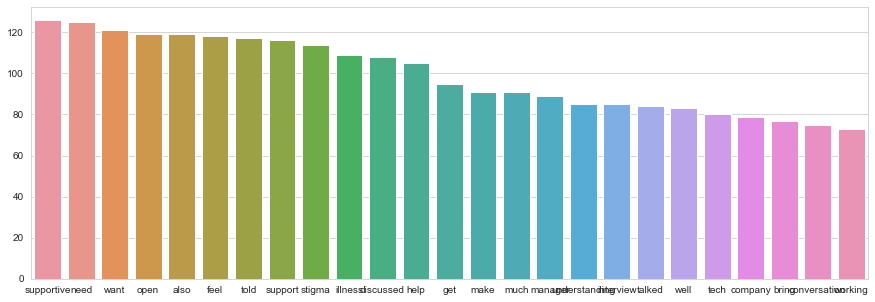

In [38]:
a=show_most_words_appear(data[data['Do you currently have a mental health disorder?']=='yes']['join'])
# a.set_xticklabels(a.get_xticklabels(),rotation=60)

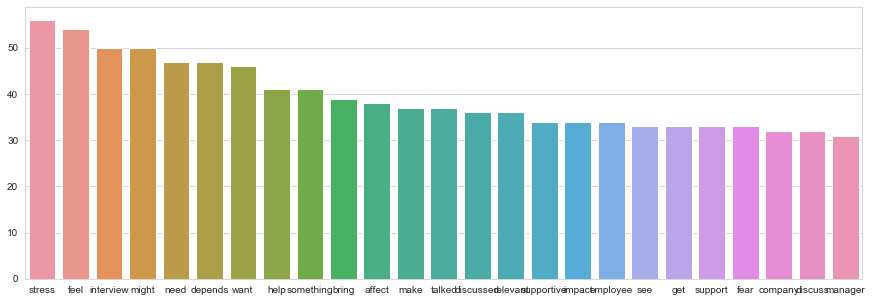

In [39]:
show_most_words_appear(data[data['Do you currently have a mental health disorder?']=='no']['join'])

In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(background_color='black',max_font_size= 40,max_words=200)
wc

In [42]:
import os
from os import path
import numpy
from PIL import Image
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
alice_mask = np.array(Image.open(path.join(d, "girl.png")))

In [43]:
def show_wordcloud(text):
    wc = WordCloud(background_color='white',max_font_size=40,max_words=200)
    my_wc = wc.generate(text)
    plt.figure(figsize=(20,5))
    plt.imshow(my_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

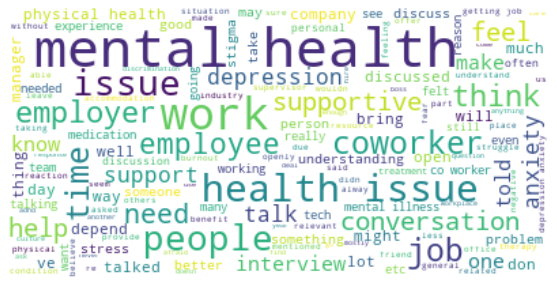

In [44]:
show_wordcloud(' '.join(list(data['join'])))

In [45]:


list_all_words =all_words.split()
word_count = Counter(list_all_words)
word_count_series = pd.Series(word_count)
word_wo_stopwords = []
for item in word_count_series.index:
    if (item not in stopwords.words('english')and(item not in onlyoneword)and (item not in exclude)):
        word_wo_stopwords.append(item)
word_count_series = word_count_series.loc[word_wo_stopwords]


In [46]:
testing = ' '.join(list(data[data['Do you currently have a mental health disorder?']=='no']['join']))
listtesting = testing.split(' ')
toremove=['told','talked','help','need','make','discussed','feel','ve','employee','manager','don','heatlh','is','mental','health','would','work','issue','issues','job','depression','think','anxiety','people','time','physical','know','coworker','coworkers','employer','could','take','like','talk','may','one']

for item in toremove:
    while item in listtesting: listtesting.remove(item) 
if "mental" in listtesting:
    print('yes')
listbarudata=' '.join(listtesting)



In [47]:
testingb = ' '.join(list(data[data['Do you currently have a mental health disorder?']=='yes']['join']))
listtestingb = testingb.split(' ')
toremove=['told','talked','help','need','make','discussed','feel','manager','employee','ve','don','heatlh','is','mental','health','would','work','issue','issues','job','depression','think','anxiety','people','time','physical','know','coworker','coworkers','employer','could','take','like','talk','may','one']

for item in toremove:
    while item in listtestingb: listtestingb.remove(item) 
    if "mental" in listtesting:
        print('yes')
listbarudatayes=' '.join(listtestingb)


In [48]:

testingp = ' '.join(list(data[data['Do you currently have a mental health disorder?']=='possibly']['join']))
listtestingp = testingp.split(' ')
toremove=['told','talked','help','need','manager','employee','ve','don','heatlh','is','mental','health','would','work','issue','issues','job','depression','think','anxiety','people','time','physical','know','coworker','coworkers','employer','could','take','like','talk','may','one']

for item in toremove:
    while item in listtestingp: listtestingp.remove(item) 
    if "mental" in listtesting:
        print('yes')
listbarudatap=' '.join(listtestingp)

In [49]:
data['Do you currently have a mental health disorder?'].value_counts()

yes         515
no          334
possibly    324
Name: Do you currently have a mental health disorder?, dtype: int64

In [50]:

string_spam = listbarudata
string_spam1 = listbarudatayes
string_spam2 = listbarudatap

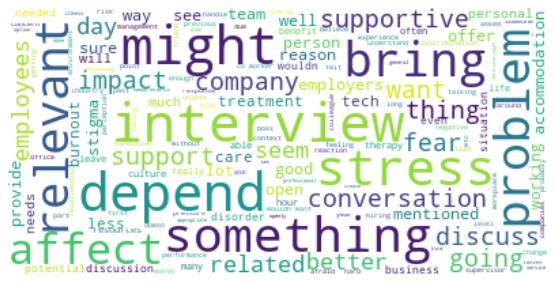

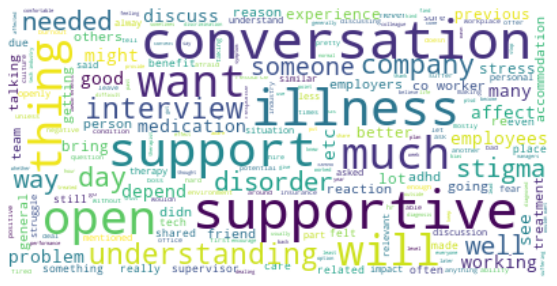

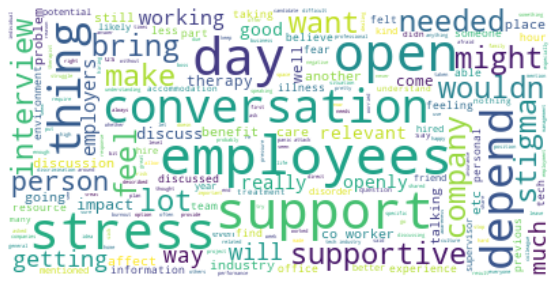

In [51]:
show_wordcloud(string_spam)
show_wordcloud(string_spam1)
show_wordcloud(string_spam2)